In [0]:
from google.colab import drive

In [0]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%cd /content/gdrive/My\ Drive/deep_learning_from_scratch
!ls -a

/content/gdrive/My Drive/deep_learning_from_scratch
0_Basis.ipynb				    8_AdvancedLearning.ipynb
10_deeplearning.ipynb			    9_CNN.ipynb
11_ParagraphSummary.ipynb		    common
12_NatureLanguage_WordRepresentation.ipynb  dataset
13_Word2Vec.ipynb			    ._.DS_Store
14_Word2Vec_Adv.ipynb			    .DS_Store
15_RNN.ipynb				    .git
16_GatedRNN.ipynb			    .gitignore
17_Seq2Seq.ipynb			    ._.gitignore
1_mlp.ipynb				    GoogleDrive_.ipynb
2_NeuralNetwork.ipynb			    .ipynb_checkpoints
3_MNIST_NeuralNetwork.ipynb		    network
4_nn_learning.ipynb			    ._README.md
5_NN_Learning_Assembly.ipynb		    README.md
6_MNIST_BatchTraining.ipynb		    tmp
7_Backpropagation.ipynb


# Text Generation

In [0]:
import numpy as np
from common.functions import softmax
from network.Rnnlm import Rnnlm
from network.BetterRnnlm import BetterRnnlm

## Generator

In [0]:
class RnnlmGen(Rnnlm):
  def generate(self, start_id, skip_ids=None, sample_size=100):
    word_ids = [start_id]
    
    x = start_id
    while len(word_ids) < sample_size:
      x = np.array(x).reshape(1,1)
      score = self.predict(x)
      p = softmax(score.flatten())
      
      sampled = np.random.choice(len(p), size=1, p=p)
      if (skip_ids is None) or (sampled not in skip_ids):
        x = sampled
        word_ids.append(int(x))
    
    return word_ids

## Generating Words

In [0]:
from dataset import ptb

In [0]:
# load dataset
corpus, word_to_id, id_to_word = ptb.load_data("train")
vocab_size = len(word_to_id)
corpus_size = len(corpus)

In [0]:
model = RnnlmGen()

In [0]:
# load pretrained weights
model.load_params("./tmp/Rnnlm.pkl")

In [0]:
# start and skip words
start_word = "you"
start_id = word_to_id[start_word]
skip_words = ["N", "<unk>", "$"]
skip_ids = [word_to_id[w] for w in skip_words]

In [0]:
# generate text
word_ids = model.generate(start_id, skip_ids)
text = ' '.join(id_to_word[w] for w in word_ids)
text = text.replace(" <eos>", ".\n")
print(text)

you libor being semel schering-plough conflicts types deteriorated foundation hoffman weird money-losing besides kenneth espn replace mills stop-loss request innopac nikko good figuring markey arrangement theories santa reflecting consolidating complicate critical ecological stops departure computer-driven revoke downgrade bennett unification disclosing fledgling highway loud licenses sunnyvale breaking circumstances plunged heroes pork cautiously palestinian jetliner facing savings dole reminder story briefs brazilian asking lovely ibm immune possible carrier discontinued alex demler stressing elsewhere black andy press rjr turns broadway mips unscrupulous excitement finally afterward bureau barring chicken baseline reports slated comfortable snapped regulation waste danny prediction concerning faster airing imf relieved m.


## Better RNNLM

In [0]:
class BetterRnnlmGen(BetterRnnlm):
  def generate(self, start_id, skip_ids=None, sample_size=100):
    word_ids = [start_id]
    
    x = start_id
    while len(word_ids) < sample_size:
      x = np.array(x).reshape(1,1)
      score = self.predict(x)
      p = softmax(score.flatten())
      
      sampled = np.random.choice(len(p), size=1, p=p)
      if (skip_ids is None) or (sampled not in skip_ids):
        x = sampled
        word_ids.append(int(x))
        
    return word_ids

In [0]:
model = BetterRnnlmGen()
model.load_params('./tmp/BetterRnnlm.pkl')

In [0]:
start_word = "you"
start_id = word_to_id[start_word]
skip_word = ["N","<unk>","$"]
skip_ids = [word_to_id[w] for w in skip_word]

In [0]:
word_ids = model.generate(start_id, skip_ids)

In [0]:
text = ' '.join(id_to_word[w] for w in word_ids)
text = text.replace("<eos>",".\n")
print(text)

you are surprised with recent softness over the past five years .
 but he says that he can do confessed to the wall street journal 's high reserve mr. luzon concerns absolutely political sterling are pushing he said .
 the most traditional are mr. bartlett and take over on tight of u.s. industry analysts and financial consultants .
 a recently opened member of saatchi & saatchi was keeping a supermarket role in the magazine to privatized investment management .
 perhaps such a plan close to the ninth knight threat was said painewebber in july .
 now there was not any


## Static States

In [0]:
model.reset_state()

In [0]:
start_words = 'the meaning of life is'
start_ids = [word_to_id[w] for w in start_words.split(' ')]

In [0]:
for x in start_ids[:-1]:
  print(id_to_word[x])
  x = np.array(x).reshape(1, 1)
  model.predict(x)

the
meaning
of
life


In [0]:
word_ids = model.generate(start_ids[-1], skip_ids)

In [0]:
word_ids = start_ids[:-1] + word_ids

In [0]:
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print('-' * 50)
print(txt)

--------------------------------------------------
the meaning of life is a fact that the basketball country is the second in one.
 these often have also started at a disadvantage.
 but the government 's second largest shareholder has reached two of the year 's postwar.
 the outlook is attractive but it 's a ivy league case.
 the true story of insider trading is meeting the benson & hedges mail party was said mr. hutchinson.
 at yale of san francisco would help by the some italian broadcast employees as we had pretty good ringers whites.
 so even in the open market it makes there prosecutors


# Seq2Seq (Encoder - Decoder Model)

## Dataset

In [0]:
import sys
sys.path.append("./dataset")

In [0]:
import sequence
import numpy
import os

In [0]:
%cd /content/gdrive/My\ Drive/deep_learning_from_scratch
!ls -a

/content/gdrive/My Drive/deep_learning_from_scratch
0_Basis.ipynb				    8_AdvancedLearning.ipynb
10_deeplearning.ipynb			    9_CNN.ipynb
11_ParagraphSummary.ipynb		    common
12_NatureLanguage_WordRepresentation.ipynb  dataset
13_Word2Vec.ipynb			    ._.DS_Store
14_Word2Vec_Adv.ipynb			    .DS_Store
15_RNN.ipynb				    .git
16_GatedRNN.ipynb			    .gitignore
17_Seq2Seq.ipynb			    ._.gitignore
1_mlp.ipynb				    GoogleDrive_.ipynb
2_NeuralNetwork.ipynb			    .ipynb_checkpoints
3_MNIST_NeuralNetwork.ipynb		    network
4_nn_learning.ipynb			    ._README.md
5_NN_Learning_Assembly.ipynb		    README.md
6_MNIST_BatchTraining.ipynb		    tmp
7_Backpropagation.ipynb


In [0]:
file_path = '/content/gdrive/My Drive/deep_learning_from_scratch/dataset/addition.txt'
print(os.path.exists(file_path))
(x_train, t_train), (x_test, t_test) = sequence.load_data(file_name=os.path.join(file_path))

True


In [0]:
print(x_train.shape, t_train.shape)

(45000, 7) (45000, 5)


In [0]:
print(x_test.shape, t_test.shape)

(5000, 7) (5000, 5)


In [0]:
char_to_id, id_to_char = sequence.get_vocab()

In [0]:
print(char_to_id)
print(id_to_char)

{'1': 0, '6': 1, '+': 2, '7': 3, '5': 4, ' ': 5, '_': 6, '9': 7, '2': 8, '0': 9, '3': 10, '8': 11, '4': 12}
{0: '1', 1: '6', 2: '+', 3: '7', 4: '5', 5: ' ', 6: '_', 7: '9', 8: '2', 9: '0', 10: '3', 11: '8', 12: '4'}


In [0]:
print(x_train[10])
print(t_train[10])

[0 9 2 8 9 5 5]
[ 6 10  9  5  5]


In [0]:
print(''.join(id_to_char[c] for c in x_train[10]))
print(''.join(id_to_char[c] for c in t_train[10]))

10+20  
_30  


## Encoder

In [0]:
from common.time_layers import TimeEmbedding, TimeLSTM

In [0]:
class Encoder:
  def __init__(self, vocab_size, wordvec_size, hidden_size):
    V, D, H = vocab_size, wordvec_size, hidden_size
    rn = np.random.randn
    
    # weight initialization
    embed_W = (rn(V, D) / 100).astype('f')
    lstm_Wx = (rn(D, 4*H) / np.sqrt(D)).astype('f')
    lstm_Wh = (rn(H, 4*H) / np.sqrt(H)).astype('f')
    lstm_b = np.zeros(4*H).astype('f')
    
    # layers
    self.embed = TimeEmbedding(embed_W)
    self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=False)
    
    # params, grads
    self.params = self.embed.params + self.lstm.params
    self.grads = self.embed.grads + self.lstm.grads
    self.hs = None
  
  def forward(self, xs):
    xs = self.embed.forward(xs)
    hs = self.lstm.forward(xs)
    self.hs = hs
    return self.hs[:,-1,:]
  
  def backward(self, dh):
    dhs = np.zeros_like(self.hs)
    dhs[:,-1,:] = dh
    
    dout = self.lstm.backward(dhs)
    dout = self.embed.backward(dout)
    return dout

## Decoder

In [0]:
from common.time_layers import TimeAffine, TimeSoftmaxWithLoss

In [0]:
class Decoder:
  def __init__(self, vocab_size, wordvec_size, hidden_size):
    V, D, H = vocab_size, wordvec_size, hidden_size
    rn = np.random.randn
    
    # weight initialization
    embed_W = (rn(V, D) / 100).astype('f')
    lstm_Wx = (rn(D, 4*H) / np.sqrt(D)).astype('f')
    lstm_Wh = (rn(H, 4*H) / np.sqrt(H)).astype('f')
    lstm_b = np.zeros(4*H).astype('f')
    affine_W = (rn(H, V) / np.sqrt(H)).astype('f')
    affine_b = np.zeros(V).astype('f')
    
    # layers
    self.embed = TimeEmbedding(embed_W)
    self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True)
    self.affine = TimeAffine(affine_W, affine_b)
    
    # params, grads
    self.params, self.grads = [], []
    for layer in (self.embed, self.lstm, self.affine):
      self.params += layer.params
      self.grads += layer.grads
  
  def forward(self, xs, h):
    self.lstm.set_state(h)
    
    out = self.embed.forward(xs)
    out = self.lstm.forward(out)
    score = self.affine.forward(out)
    return score
  
  def backward(self, dscore):
    dout = self.affine.backward(dscore)
    dout = self.lstm.backward(dout)
    dout = self.embed.backward(dout)
    
    dh = self.lstm.dh
    return dh
  
  def generate(self, h, start_id, sample_size):
    sampled = []
    sample_id = start_id
    self.lstm.set_state(h)
    
    for _ in range(sample_size):
      x = np.array(sample_id).reshape(1,1)
      out = self.embed.forward(x)
      out = self.lstm.forward(out)
      score = self.affine.forward(out)
      
      sample_id = np.argmax(score.flatten())
      sampled.append(int(sample_id))
      
    return sampled

In [0]:
class Seq2Seq:
  def __init__(self, vocab_size, wordvec_size, hidden_size):
    V, D, H = vocab_size, wordvec_size, hidden_size
    
    # create layers
    self.encoder = Encoder(V, D, H)
    self.decoder = Decoder(V, D, H)
    self.softmax = TimeSoftmaxWithLoss()
    
    self.params = self.encoder.params + self.decoder.params
    self.grads = self.encoder.grads + self.decoder.grads
  
  def forward(self, xs, ts):
    h = self.encoder.forward(xs)
    
    decoder_xs, decoder_ts = ts[:,:-1], ts[:,1:]
    score = self.decoder.forward(decoder_xs, h)
    loss = self.softmax.forward(score, decoder_ts)
    return loss
  
  def backward(self, dout=1):
    dscore = self.softmax.backward(dout)
    dh = self.decoder.backward(dscore)
    dh = self.encoder.backward(dh)
    return dh
  
  def generate(self, xs, start_id, sample_size):
    h = self.encoder.forward(xs)
    sampled = self.decoder.generate(h, start_id, sample_size)
    return sampled

## Training

In [0]:
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq

In [0]:
# load datasets
file_path = '/content/gdrive/My Drive/deep_learning_from_scratch/dataset/addition.txt'
print(os.path.exists(file_path))
(x_train, t_train), (x_test, t_test) = sequence.load_data(file_name=os.path.join(file_path))
char_to_id, id_to_char = sequence.get_vocab()

True


In [0]:
# hyperparameters
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

In [0]:
model = Seq2Seq(vocab_size, wordvec_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

In [0]:
acc_list = []

for epoch in range(max_epoch):
  trainer.fit(x_train, t_train, 
              max_epoch=1, batch_size=batch_size, 
              max_grad=max_grad, eval_interval=20)
  
  correct_num = 0
  for i in range(len(x_test)):
    question, correct = x_test[[i]], t_test[[i]]
    verbose = i < 10
    correct_num += eval_seq2seq(model, question, correct, id_to_char, verbose)
    
  acc = float(correct_num) / len(x_test)
  acc_list.append(acc)
  print('val accuracy: {:3f}%'.format(acc * 100))

| epoch 1 |  iter 1 / 351 | time 0[s] | loss 2.56
| epoch 1 |  iter 21 / 351 | time 1[s] | loss 2.53
| epoch 1 |  iter 41 / 351 | time 2[s] | loss 2.17
| epoch 1 |  iter 61 / 351 | time 3[s] | loss 1.96
| epoch 1 |  iter 81 / 351 | time 4[s] | loss 1.92
| epoch 1 |  iter 101 / 351 | time 5[s] | loss 1.87
| epoch 1 |  iter 121 / 351 | time 7[s] | loss 1.85
| epoch 1 |  iter 141 / 351 | time 8[s] | loss 1.83
| epoch 1 |  iter 161 / 351 | time 9[s] | loss 1.79
| epoch 1 |  iter 181 / 351 | time 10[s] | loss 1.77
| epoch 1 |  iter 201 / 351 | time 11[s] | loss 1.77
| epoch 1 |  iter 221 / 351 | time 12[s] | loss 1.76
| epoch 1 |  iter 241 / 351 | time 13[s] | loss 1.76
| epoch 1 |  iter 261 / 351 | time 14[s] | loss 1.76
| epoch 1 |  iter 281 / 351 | time 15[s] | loss 1.75
| epoch 1 |  iter 301 / 351 | time 16[s] | loss 1.74
| epoch 1 |  iter 321 / 351 | time 17[s] | loss 1.75
| epoch 1 |  iter 341 / 351 | time 18[s] | loss 1.74
Q 77+85  
T 162 
☒ 100 
---
Q 975+164
T 1139
☒ 1000
---
Q 582

In [0]:
import matplotlib.pyplot as plt

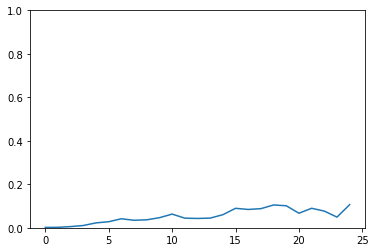

In [0]:
plt.plot(acc_list)
plt.ylim(0,1)
plt.show()

# Advanced Seq2Seq

## Reverse Input Sequence

In [0]:
rev_model = Seq2Seq(vocab_size, wordvec_size, hidden_size)
optimizer = Adam()
rev_trainer = Trainer(rev_model, optimizer)

In [0]:
x_train, x_test = x_train[:,::-1], x_test[:,::-1]

In [0]:
print(''.join([id_to_char[w] for w in x_train[10]]))

  02+01


In [0]:
rev_acc_list = []

for epoch in range(max_epoch):
  rev_trainer.fit(x_train, t_train, 
              max_epoch=1, batch_size=batch_size, 
              max_grad=max_grad, eval_interval=20)
  
  correct_num = 0
  for i in range(len(x_test)):
    question, correct = x_test[[i]], t_test[[i]]
    verbose = i < 10
    correct_num += eval_seq2seq(rev_model, question, correct, id_to_char, verbose)
    
  acc = float(correct_num) / len(x_test)
  rev_acc_list.append(acc)
  print('val accuracy: {:3f}%'.format(acc * 100))

| epoch 1 |  iter 1 / 351 | time 0[s] | loss 2.56
| epoch 1 |  iter 21 / 351 | time 0[s] | loss 2.53
| epoch 1 |  iter 41 / 351 | time 1[s] | loss 2.20
| epoch 1 |  iter 61 / 351 | time 2[s] | loss 1.98
| epoch 1 |  iter 81 / 351 | time 3[s] | loss 1.91
| epoch 1 |  iter 101 / 351 | time 4[s] | loss 1.87
| epoch 1 |  iter 121 / 351 | time 5[s] | loss 1.85
| epoch 1 |  iter 141 / 351 | time 6[s] | loss 1.82
| epoch 1 |  iter 161 / 351 | time 7[s] | loss 1.80
| epoch 1 |  iter 181 / 351 | time 8[s] | loss 1.79
| epoch 1 |  iter 201 / 351 | time 9[s] | loss 1.78
| epoch 1 |  iter 221 / 351 | time 10[s] | loss 1.77
| epoch 1 |  iter 241 / 351 | time 11[s] | loss 1.76
| epoch 1 |  iter 261 / 351 | time 12[s] | loss 1.77
| epoch 1 |  iter 281 / 351 | time 13[s] | loss 1.76
| epoch 1 |  iter 301 / 351 | time 14[s] | loss 1.75
| epoch 1 |  iter 321 / 351 | time 15[s] | loss 1.75
| epoch 1 |  iter 341 / 351 | time 16[s] | loss 1.74
Q   58+77
T 162 
☒ 100 
---
Q 461+579
T 1139
☒ 1000
---
Q  48+2

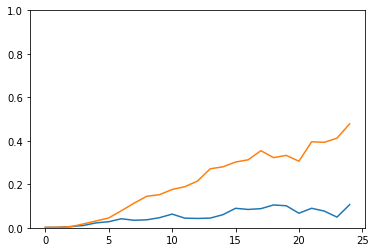

In [0]:
plt.plot(acc_list)
plt.plot(rev_acc_list)
plt.ylim(0,1)
plt.show()

## Peeky Decoder

In [0]:
class PeekyDecoder:
  def __init__(self, vocab_size, wordvec_size, hidden_size):
    V, D, H = vocab_size, wordvec_size, hidden_size
    rn = np.random.randn
    
    # weight initialization
    embed_W = (rn(V, D) / 100).astype('f')
    lstm_Wx = (rn(H + D, 4 * H) / np.sqrt(H + D)).astype('f')
    lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
    lstm_b = np.zeros(4 * H).astype('f')
    affine_W = (rn(H + H, V) / np.sqrt(H + H)).astype('f')
    affine_b = np.zeros(V).astype('f')
    
    # layers 
    self.embed = TimeEmbedding(embed_W)
    self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True)
    self.affine = TimeAffine(affine_W, affine_b)
    
    # weights and grads
    self.params, self.grads = [], []
    for layer in (self.embed, self.lstm, self.affine):
      self.params += layer.params
      self.grads += layer.grads
    self.cache = None
  
  def forward(self, xs, h):
    N, T = xs.shape
    N, H = h.shape
    
    out = self.embed.forward(xs)
    
    hs = np.repeat(h, T, axis=0).reshape(N, T, H)
    out = np.concatenate((hs, out), axis=2)
    self.lstm.set_state(h)
    out = self.lstm.forward(out)
    
    out = np.concatenate((hs, out), axis=2)
    score = self.affine.forward(out)
    self.cache = H
    
    return score
  
  def backward(self, dscore):
    H = self.cache
    
    dout = self.affine.backward(dscore)
    dout, dhs0 = dout[:,:,H:], dout[:,:,:H]
    dout = self.lstm.backward(dout)
    dembed, dhs1 = dout[:,:,H:], dout[:,:,:H]
    self.embed.backward(dembed)
    
    dhs = dhs0 + dhs1
    dh = self.lstm.dh + np.sum(dhs, axis=1)
    return dh
  
  def generate(self, h, start_id, sample_size):
    sampled = []
    sample_x = start_id
    self.lstm.set_state(h)
    
    N, H = h.shape
    peeky_h = h.reshape(1,1,H)
    for _ in range(sample_size):
      x = np.array([sample_x]).reshape((1,1))
      out = self.embed.forward(x)
      
      out = np.concatenate((peeky_h, out), axis=2)
      out = self.lstm.forward(out)
      
      out = np.concatenate((peeky_h, out), axis=2)
      score = self.affine.forward(out)
      
      sample_x = np.argmax(score.flatten())
      sampled.append(sample_x)
      
    return sampled

## Peeky Seq2Seq

In [0]:
class PeekySeq2Seq(Seq2Seq):
  def __init__(self, vocab_size, wordvec_size, hidden_size):
    V, D, H = vocab_size, wordvec_size, hidden_size
    
    self.encoder = Encoder(V, D, H)
    self.decoder = PeekyDecoder(V, D, H)
    self.softmax = TimeSoftmaxWithLoss()
    
    self.params = self.encoder.params + self.decoder.params
    self.grads = self.encoder.grads + self.decoder.grads

In [0]:
peeky_model = PeekySeq2Seq(vocab_size, wordvec_size, hidden_size)
optimizer = Adam()
peeky_trainer = Trainer(peeky_model, optimizer)

In [0]:
peeky_acc_list = []

for epoch in range(max_epoch):
  peeky_trainer.fit(x_train, t_train, 
              max_epoch=1, batch_size=batch_size, 
              max_grad=max_grad, eval_interval=100)
  
  correct_num = 0
  for i in range(len(x_test)):
    question, correct = x_test[[i]], t_test[[i]]
    verbose = i < 10
    correct_num += eval_seq2seq(peeky_model, question, correct, id_to_char, verbose)
    
  acc = float(correct_num) / len(x_test)
  peeky_acc_list.append(acc)
  print('val accuracy: {:3f}%'.format(acc * 100))

| epoch 1 |  iter 1 / 351 | time 0[s] | loss 2.57
| epoch 1 |  iter 101 / 351 | time 5[s] | loss 2.08
| epoch 1 |  iter 201 / 351 | time 12[s] | loss 1.78
| epoch 1 |  iter 301 / 351 | time 19[s] | loss 1.75
Q   58+77
T 162 
☒ 100 
---
Q 461+579
T 1139
☒ 1003
---
Q  48+285
T 666 
☒ 102 
---
Q   551+8
T 163 
☒ 102 
---
Q  55+763
T 422 
☒ 102 
---
Q 752+006
T 857 
☒ 1033
---
Q 292+167
T 1053
☒ 1033
---
Q 795+038
T 1427
☒ 1000
---
Q  838+62
T 864 
☒ 102 
---
Q  39+341
T 236 
☒ 102 
---
val accuracy: 0.320000%
| epoch 2 |  iter 1 / 351 | time 0[s] | loss 1.72
| epoch 2 |  iter 101 / 351 | time 6[s] | loss 1.69
| epoch 2 |  iter 201 / 351 | time 13[s] | loss 1.65
| epoch 2 |  iter 301 / 351 | time 20[s] | loss 1.61
Q   58+77
T 162 
☒ 101 
---
Q 461+579
T 1139
☒ 1001
---
Q  48+285
T 666 
☒ 511 
---
Q   551+8
T 163 
☒ 111 
---
Q  55+763
T 422 
☒ 477 
---
Q 752+006
T 857 
☒ 711 
---
Q 292+167
T 1053
☒ 1011
---
Q 795+038
T 1427
☒ 1301
---
Q  838+62
T 864 
☒ 773 
---
Q  39+341
T 236 
☒ 371 
---


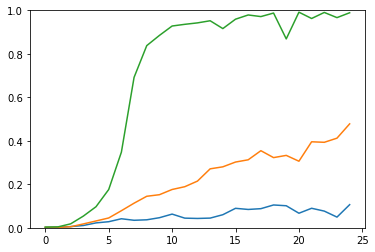

In [0]:
plt.plot(acc_list)
plt.plot(rev_acc_list)
plt.plot(peeky_acc_list)
plt.ylim(0,1)
plt.show()